## Importing the necessary libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing the data set

In [44]:
#importing the data
data= pd.read_csv('Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [45]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Preprocessing the data and scaling the data

### 1.Checking for null values

In [46]:
# check for missing values
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [47]:
#split the data into features(x) and variable(y)
X = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

### 2. Scaling the data

In [48]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)

[[ 2.01641149e+00  5.60752915e-01  2.15394309e+00]
 [ 1.95586034e+00  1.08280658e+00  1.92360040e+00]
 [ 1.75436374e+00 -7.28257028e-01  1.62652767e+00]
 [ 1.55478369e+00 -9.63646307e-02  1.42221024e+00]
 [ 1.50493720e+00 -1.07991935e+00  1.28152771e+00]
 [ 1.27980001e+00 -7.76239071e-01  1.25421046e+00]
 [ 1.34006641e+00  9.32147208e-01 -6.88149930e-01]
 [ 1.24505666e+00  8.71980011e-01  9.32185978e-01]
 [ 1.03036886e+00  9.86952101e-01  8.30886909e-01]
 [ 1.09181921e+00 -4.56640246e-01  7.76107440e-01]
 [ 6.20398248e-01 -3.87599089e-01  1.49807267e-01]
 [ 5.93085418e-01 -1.06553960e+00  3.19833623e-01]
 [ 4.43259872e-01  2.15449064e-01  3.20617441e-01]
 [ 4.02077603e-01  5.10178953e-01  3.43956788e-01]
 [ 1.01718075e+00  1.26919939e+00  3.75742273e-01]
 [ 8.97913123e-01  4.58678535e-02  4.19218702e-01]
 [ 9.44411957e-02  9.11841968e-03  4.40446224e-01]
 [ 4.60720127e-01  8.55666318e-01  5.91016724e-01]
 [ 3.96724938e-01 -2.58465367e-01  6.92992062e-01]
 [ 2.79441650e-01  1.15983657e+

In [49]:
X_new=X_scaled

## Train-test set split

In [50]:
#split the data into traina data and test data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Checking the model accuracy of different models using MSE


LR: 99046764.659402 (120306924.840315)
CART: 400899498.600434 (400011549.559973)
RF: 341314105.434174 (420324031.952692)


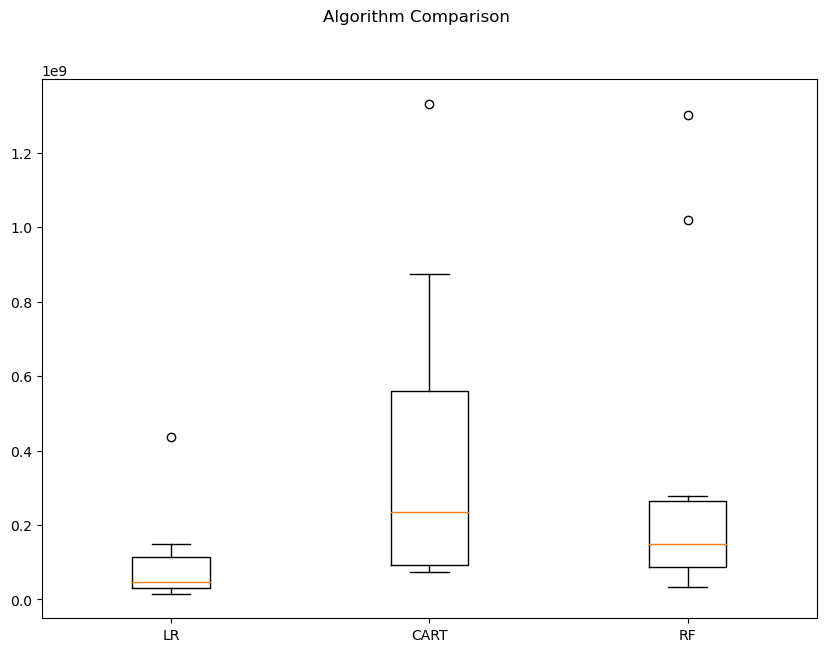

In [51]:
#Checking different model accuracy
from sklearn.model_selection import cross_val_score, KFold

models = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_new, y, cv=kfold, scoring="neg_mean_squared_error")
    cv_results = -cv_results  # Take the negative of MSE to obtain positive values
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure(figsize=(10, 7))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Construction of these algorithms

In [53]:
#construct different regression algorithms
decision =DecisionTreeRegressor()
random = RandomForestRegressor()

## Training the models

In [54]:
#Train the model based on the training set
decision.fit(X_train, y_train)
random.fit(X_train, y_train)

RandomForestRegressor()

## Model testing

In [55]:
#predict the results
decision_preds= decision.predict(X_test)
randomforest_preds = random.predict(X_test)

## Model Evaluation

In [56]:
#Calculations of matrices
decision_tree_regression_metrics = {
    'MSE': mean_squared_error(y_test, decision_preds),
    'MAE': mean_absolute_error(y_test, decision_preds),
    'R-squared': r2_score(y_test, decision_preds)
}
random_forest_regression_metrics = {
    'MSE': mean_squared_error(y_test, randomforest_preds),
    'MAE': mean_absolute_error(y_test, randomforest_preds),
    'R-squared': r2_score(y_test, randomforest_preds)
}


In [60]:
# Step 9: Print the regression metrics
print()
print("Decision Tree Regression Metrics:")
print(decision_tree_regression_metrics)
print()
print("Random Forest Regression Metrics:")
print(random_forest_regression_metrics)


Decision Tree Regression Metrics:
{'MSE': 247065375.57290667, 'MAE': 10818.602666666666, 'R-squared': 0.8686721415138203}

Random Forest Regression Metrics:
{'MSE': 156870358.7047839, 'MAE': 8524.781733333333, 'R-squared': 0.9166153969535937}


## Model Selection

In [61]:
#Choose the best model based on metrics
best_model = min([decision_tree_regression_metrics, random_forest_regression_metrics], key=lambda x: x['MSE'])

In [62]:
print("Best Model:")
print(best_model)

Best Model:
{'MSE': 156870358.7047839, 'MAE': 8524.781733333333, 'R-squared': 0.9166153969535937}


## Testing against user input

In [64]:
#Prediction

# User-inputed data
input_data = [[162597.7,151377.59,443898.53
]]  # Replace with your own input data

# Standardize the input data
input_data_scaled = scaler.transform(input_data)

# Make predictions using the random forest
predicted_profit = random.predict(input_data_scaled)

# Print the predicted profit
print("Predicted Profit:", predicted_profit[0])


Predicted Profit: 186979.64000000007


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


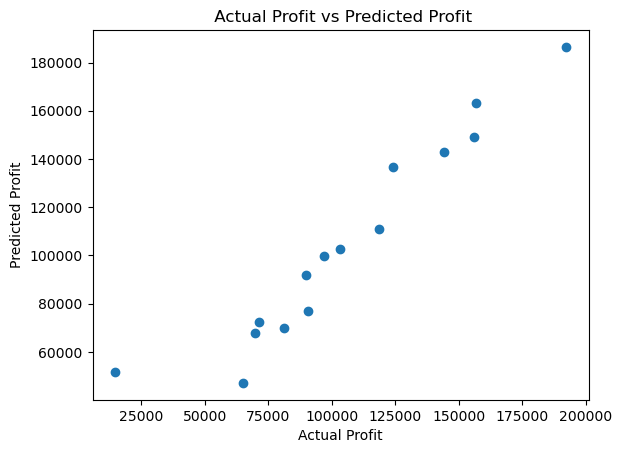

In [65]:
plt.scatter(y_test, randomforest_preds)
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title(" Actual Profit vs Predicted Profit")
plt.show()

## Saving the training model

In [66]:
import pickle

# Save the trained model
model_file = 'X_train.pkl'
pickle.dump(X_train, open(model_file, 'wb'))

# Save the scaler object
scaler_file = 'scaler.pkl'
pickle.dump(scaler, open(scaler_file, 'wb'))

In [67]:
#Loading the saved model
loaded_model = pickle.load(open('X_train.pkl','rb'))